1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np # N-dimensional array / broadcasting / random numbers
import matplotlib.pyplot as plt # graphs
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
% matplotlib inline
import scipy as sp
from scipy import stats
import pandas as pd # DataFrame and label-based slicing
import seaborn as sns  # data visualization
import math

In [2]:
#sns.set(style="darkgrid") #beware that it remains that until you change it again
sns.set(style="white") # to return to default style

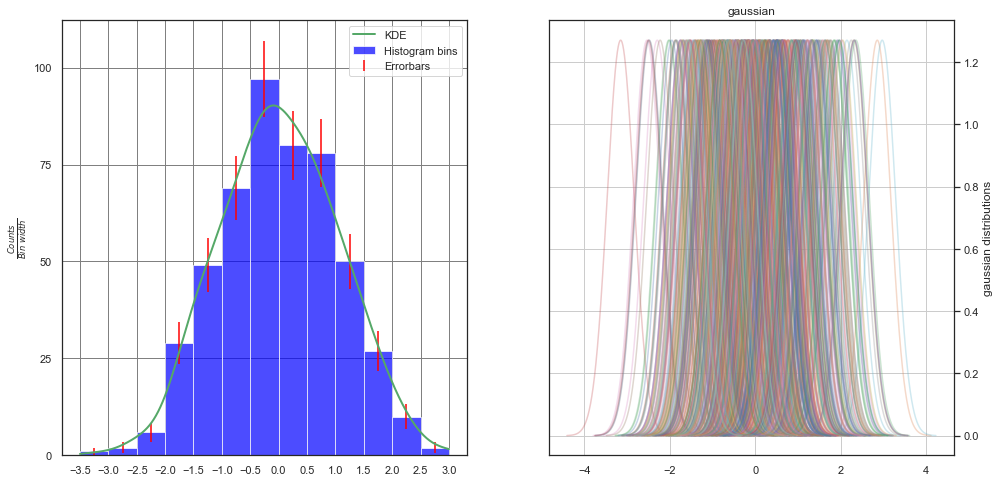

In [3]:
mean,std,N=0,1,500 # 500 is of order O(100)
x=np.random.normal(mean,std,N)


bin_width=0.5
s=str(bin_width)
p=s[::-1].find('.')
def myroundup(x, prec=p, base=bin_width):
  return round(base * math.ceil(float(x)/base),prec)
def myrounddown(x, prec=p, base=bin_width):
  return round(base * math.floor(float(x)/base),prec)
fig, (ax, ga) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax.set_ylabel(r'$\frac{Counts}{Bin \, \, width}$')
bin_height, bin_edges, _ = ax.hist(x, bins=np.arange(myrounddown(x.min()),myroundup(x.max())+bin_width,bin_width),label='Histogram bins', alpha=0.7, color='blue')
central_points = (bin_edges[1:]+bin_edges[:-1])/2
ax.errorbar(central_points, bin_height, np.sqrt(bin_height), fmt = 'none', label = "Errorbars", ecolor="red")
ax.grid(color='grey')
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.xaxis.set_major_locator(MultipleLocator(bin_width))

std_gauss  = 1.06*x.std()*(x.size**(-1/5))

ga.set_title('gaussian')
ga.set_ylabel('gaussian distributions')
ga.grid(True)
ga.yaxis.set_label_position('right')
ga.yaxis.tick_right()

for c in x: # cycle through the np.array x 
    interval=np.linspace(c-4*std_gauss,c+4*std_gauss, 1000)#for each gaussian discretize from -4*sigma to +4*sigma with 1000 steps
    ga.plot(interval, sp.stats.norm.pdf(interval,loc=c,scale=std_gauss), ls = '-', alpha = 0.3)

total_interval=np.linspace(myrounddown(x.min()),myroundup(x.max()), N+1)
v=np.zeros(0) #we create an empty numpy array to fill it later with numpy.append()
for i in total_interval:
    v=np.append(v,bin_width*np.sum(sp.stats.norm.pdf(x,loc=i,scale=std_gauss)))

#normalization
norm_gauss = sp.integrate.trapz(v, total_interval)
norm_hist = sp.integrate.trapz(bin_height, central_points)    


ax.plot(total_interval,v*norm_hist/norm_gauss,'g-', lw=2, label='KDE') # lw=LineWidth g- means g=green -=line
ax.legend(markerscale=2)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [4]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
# saves the file in the current directory hence LaboratoryOfComputationalPhysics

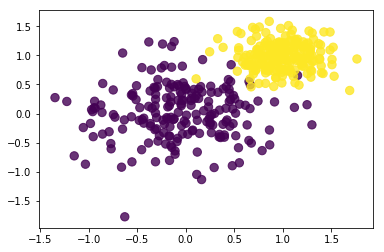

In [5]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

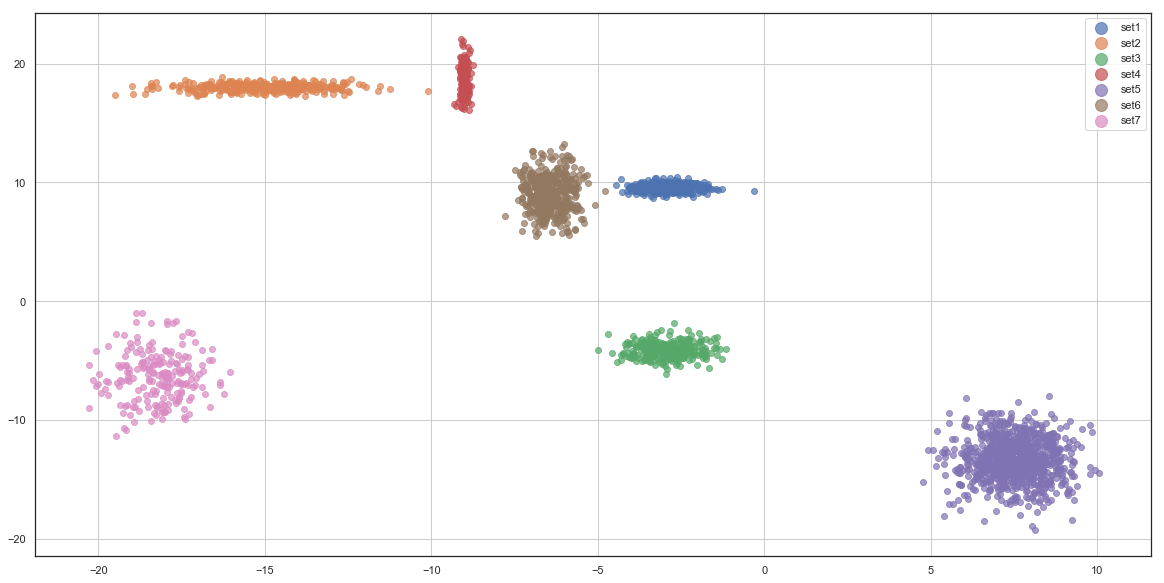

In [6]:
n=7 #number of clusters
mean=20 #maximum and minimun of the range from which the x_mean and y_mean are uniformly distributed
std=2 #maximum of the range from which the x_mean and y_mean are uniformly distributed (minimum is 0)
lowest=100 #minimum number of points for each cluster
highest=1000 #maximum number of points for each cluster

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

for i in range(n):
    size=np.random.randint(lowest,highest)

    m1=np.random.uniform(-mean,mean)
    m2=np.random.uniform(-mean,mean)

    std1=np.random.uniform(0,std)
    std2=np.random.uniform(0,std)

    x = np.random.normal(m1,std1,size)
    y = np.random.normal(m2,std2,size)

    ax.scatter(x,y,alpha=0.7,label='set'+str(i+1))

ax.grid(True)
ax.legend(markerscale=2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
# ! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
# saves the file in the current directory hence LaboratoryOfComputationalPhysics

C:\Users\CP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


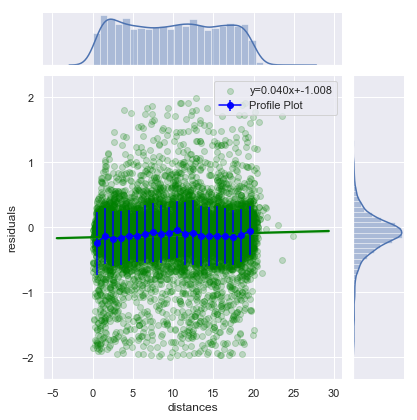

In [9]:
#filling the DataFrame
dataraw = pd.DataFrame(np.load('residuals_261.npy').item())

#taking away the unwanted data
data = dataraw[np.absolute(dataraw['residuals'])<2]

#the function returns 5 values but I want only the first 2
slope,intercept,_,_,_ = sp.stats.linregress(dataraw['distances'], dataraw['residuals']) 

#seaborn jointplot
sns.set()
joint = sns.jointplot(x = "distances", y = "residuals", data = data, kind="reg",scatter_kws={'alpha':0.2},joint_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept),'color':'green'})

#getting the bin centers
nbin=20 #this is the number of blue points with the error bar
bin_edges = np.linspace(0,20,nbin+1)
central_points =(bin_edges[1:] + bin_edges[:-1])/2


#filling the array
y=np.array([data.loc[(data['distances'] >=bin_edges[i]) & (data['distances'] <bin_edges[i+1])]['residuals'].mean() for i in range(nbin)])
erry=np.array([data.loc[(data['distances'] >=bin_edges[i]) & (data['distances'] <bin_edges[i+1])]['residuals'].std() for i in range(nbin)])

#plotting profile
plt.errorbar(central_points,y,yerr=erry, label='Profile Plot',linewidth=1.5,color='blue',marker='o')
joint.ax_joint.legend()